In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
data_folder = "data/"
filename = "stressng_kepler_query.json"

In [3]:
file = open(data_folder + filename)
data = file.read()
data = json.loads(data)

In [4]:
result = {}

for metric in data:
    temp = []
    if metric == 'kepler_container_joules_total':
        for container_metric in data[metric]:
            tmp = [[container_metric['metric']['container_id'], container_metric['metric']['instance'], values[0], values[1]] for values in container_metric['values']]
            tmp_df = pd.DataFrame(tmp, columns =['container_id', 'node', 'time', 'value'])
            temp.append(tmp_df)
    elif metric == 'node_cpu_seconds_total':
        for node_metric in data[metric]:
            if node_metric['metric']['mode'] == "idle":
                continue
            tmp = [[node_metric['metric']['instance'], node_metric['metric']['cpu'], values[0], values[1]] for values in node_metric['values']]
            tmp_df = pd.DataFrame(tmp, columns =['node', 'cpu', 'time', 'value'])
            temp.append(tmp_df)
    elif metric == 'kepler_node_core_joules_total':
        for node_metric in data[metric]:
            tmp = [[node_metric['metric']['instance'], node_metric['metric']['package'], values[0], values[1]] for values in node_metric['values']]
            tmp_df = pd.DataFrame(tmp, columns =['node', 'cpu', 'time', 'value'])
            temp.append(tmp_df)
    else:
        continue
    t = pd.concat(temp)
    t['value'] = t['value'].astype(float)
    result[metric] = t.reset_index(drop = True)

In [5]:
result['kepler_container_joules_total']

,container_id,node,time,value
0,021bd9adb7f8e7363ee332a4c9acf15768331d30031b78...,kind-for-training-control-plane,1699450395,0.027
1,021bd9adb7f8e7363ee332a4c9acf15768331d30031b78...,kind-for-training-control-plane,1699450398,0.027
2,021bd9adb7f8e7363ee332a4c9acf15768331d30031b78...,kind-for-training-control-plane,1699450401,0.027
3,021bd9adb7f8e7363ee332a4c9acf15768331d30031b78...,kind-for-training-control-plane,1699450404,0.027
4,021bd9adb7f8e7363ee332a4c9acf15768331d30031b78...,kind-for-training-control-plane,1699450407,0.027
...,...,...,...,...
165825,system_processes,kind-for-training-control-plane,1699458288,174803.859
165826,system_processes,kind-for-training-control-plane,1699458291,174811.389
165827,system_processes,kind-for-training-control-plane,1699458294,174818.694
165828,system_processes,kind-for-training-control-plane,1699458297,174825.972


In [6]:
result['node_cpu_seconds_total']

,node,cpu,time,value
0,172.19.0.2:9100,0,1699436700,662.48
1,172.19.0.2:9100,0,1699436703,662.48
2,172.19.0.2:9100,0,1699436706,662.48
3,172.19.0.2:9100,0,1699436709,662.48
4,172.19.0.2:9100,0,1699436712,662.50
...,...,...,...,...
403251,172.19.0.2:9100,7,1699458288,13348.57
403252,172.19.0.2:9100,7,1699458291,13348.66
403253,172.19.0.2:9100,7,1699458294,13348.66
403254,172.19.0.2:9100,7,1699458297,13348.66


In [7]:
energy = result['kepler_container_joules_total']
energy_agg = energy.groupby(['node', 'time'], as_index=False)['value'].sum()

In [8]:
energy_agg

,node,time,value
0,kind-for-training-control-plane,1699436700,202291.245
1,kind-for-training-control-plane,1699436703,202310.019
2,kind-for-training-control-plane,1699436706,202319.985
3,kind-for-training-control-plane,1699436709,202336.335
4,kind-for-training-control-plane,1699436712,202347.903
...,...,...,...
7196,kind-for-training-control-plane,1699458288,245421.786
7197,kind-for-training-control-plane,1699458291,245429.421
7198,kind-for-training-control-plane,1699458294,245436.894
7199,kind-for-training-control-plane,1699458297,245444.286


In [9]:
cpu_util = result['node_cpu_seconds_total']
cpu_util_agg = cpu_util.groupby(['node', 'time'], as_index=False)['value'].sum()

In [10]:
cpu_util_agg

,node,time,value
0,172.19.0.2:9100,1699436700,129558.41
1,172.19.0.2:9100,1699436703,129558.41
2,172.19.0.2:9100,1699436706,129558.41
3,172.19.0.2:9100,1699436709,129558.41
4,172.19.0.2:9100,1699436712,129569.97
...,...,...,...
7196,172.19.0.2:9100,1699458288,180225.35
7197,172.19.0.2:9100,1699458291,180227.00
7198,172.19.0.2:9100,1699458294,180227.00
7199,172.19.0.2:9100,1699458297,180227.00


In [11]:
node_power = result['kepler_node_core_joules_total']
node_power = node_power.groupby(['node', 'time'], as_index=False)['value'].sum()

In [12]:
node_power['node'] = '172.19.0.2:9100'
energy_agg['node'] = '172.19.0.2:9100'

In [13]:
node_power

,node,time,value
0,172.19.0.2:9100,1699436700,560041.128
1,172.19.0.2:9100,1699436703,560089.566
2,172.19.0.2:9100,1699436706,560115.261
3,172.19.0.2:9100,1699436709,560157.453
4,172.19.0.2:9100,1699436712,560187.288
...,...,...,...
7196,172.19.0.2:9100,1699458288,1105135.893
7197,172.19.0.2:9100,1699458291,1105155.576
7198,172.19.0.2:9100,1699458294,1105174.845
7199,172.19.0.2:9100,1699458297,1105193.889


In [14]:
final = pd.merge(cpu_util_agg, energy_agg, on = ['time', 'node'])
final.rename(columns={'value_x':'util', 'value_y':'energy'}, inplace=True)
final.sort_values('time', inplace=True)

final = pd.merge(final, node_power, on = ['time', 'node'])
final.rename(columns={'value':'power'}, inplace=True)

In [15]:
final

,node,time,util,energy,power
0,172.19.0.2:9100,1699436700,129558.41,202291.245,560041.128
1,172.19.0.2:9100,1699436703,129558.41,202310.019,560089.566
2,172.19.0.2:9100,1699436706,129558.41,202319.985,560115.261
3,172.19.0.2:9100,1699436709,129558.41,202336.335,560157.453
4,172.19.0.2:9100,1699436712,129569.97,202347.903,560187.288
...,...,...,...,...,...
7196,172.19.0.2:9100,1699458288,180225.35,245421.786,1105135.893
7197,172.19.0.2:9100,1699458291,180227.00,245429.421,1105155.576
7198,172.19.0.2:9100,1699458294,180227.00,245436.894,1105174.845
7199,172.19.0.2:9100,1699458297,180227.00,245444.286,1105193.889


In [16]:
import model

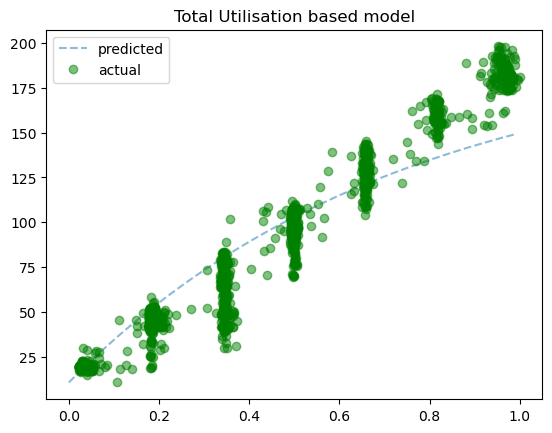

In [17]:
m = model.UtilisationPowerModel()
node_power_models = {}
for node in final['node'].unique():
    node_df = final[final['node'] == node]
    node_df['util'] = node_df['util'].diff()
    node_df['energy'] = node_df['energy'].diff()
    node_df['power'] = node_df['power'].diff()
    node_df.fillna(0, inplace=True)
    node_df = node_df[(node_df[['util']] != 0).all(axis=1)]
    max_util = max(node_df['util'])
    node_df['util'] = node_df['util']/max_util
    node_power_models[node] = m.get_model(node_df[['util', 'power']])

In [18]:
node_power_models

{'172.19.0.2:9100': (array([[51.507538],
         [50.91327 ],
         [52.595932],
         ...,
         [16.720673],
         [17.067963],
         [16.411423]], dtype=float32),
  [6537.95947265625,
   606.0128173828125,
   331.73492431640625,
   282.229736328125,
   270.3161315917969,
   267.09515380859375,
   266.17449951171875,
   265.90374755859375,
   265.82293701171875,
   265.7986145019531],
  (tensor(198.0390, requires_grad=True),
   tensor(-187.4448, requires_grad=True),
   tensor(-1.3565, requires_grad=True)))}